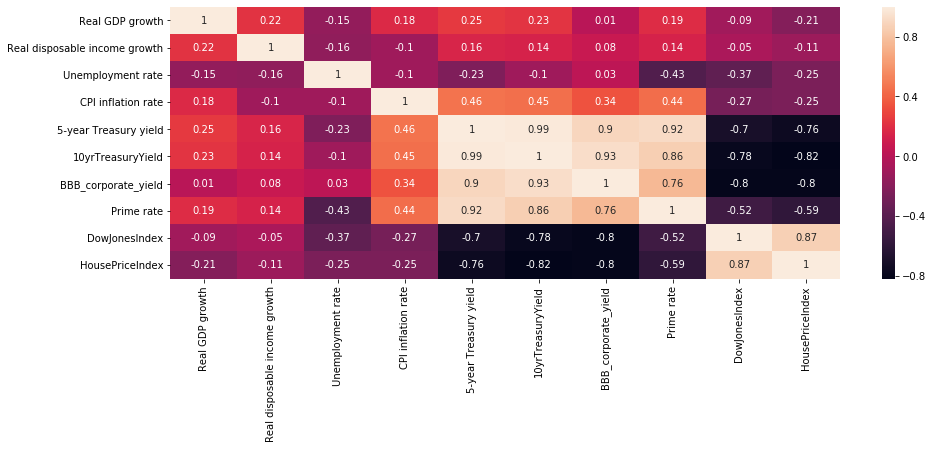

In [1]:
import pandas as pd
from sklearn import linear_model as lm
import random
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data
df = pd.read_csv('Desktop\\StressTesting\\hpi_dji.csv')

#Explore data, view the first few rows
#df.head()

#Next, we create a correlation matrix that measures the linear relationships between the variables using heatmap function from seaborn lib
cor_matrix = df.corr().round(2)
plt.figure(figsize = (15,5))
sns.heatmap(data = cor_matrix, annot = True) # annot = True to print the values inside the square

In [4]:
## One way of converting dataframe to 2D
# You have to make it an array by putting double squared brackets to make it a single element of the 2D array 
# as first bracket initializes the array and the second makes it an element of that array.
#x = df[['DowJonesIndex']] ##this keeps dataframe to dataframe and is converting to 2D
#y = df['HousePriceIndex'] ## this converts the dataframe to series and remains 1D
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state =10)

#print(x_train.head())
#print(x_train.shape)
#print(y_test.head())
#print(y_test.shape)

# fit a model
#model = lm.LinearRegression()
#model = model.fit(x_train, y_train)
#y_pred = model.predict(x_test) #predict function requires a 2D array so X has to be 2D, y values can be 1D
#print(y_pred)

##2nd way of converting dataframe to 2D araay
x = df['DowJonesIndex']
x = x.values.reshape(-1, 1)
y = df[['HousePriceIndex']].values   ##values function converts dataframe or series to an araay

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state =10)

# fit a model
model = lm.LinearRegression()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)  #predict function requires a 2D array so X has to be 2D, y values can be 1D

In [5]:
##We can compare the actual output values for X_test with the predicted values
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison.head()

,Actual,Predicted
0,190.7,128.618442
1,205.9,221.577898
2,84.0,107.896941
3,137.6,136.719451
4,200.6,214.402213


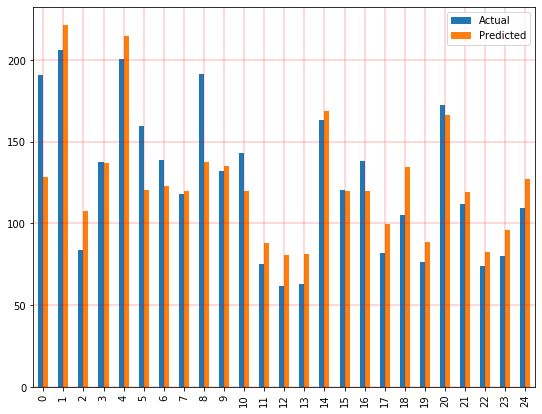

In [6]:
#We can also visualize comparison result as a bar graph, we will use 25 values
bar_chart = comparison.head(25)
bar_chart.plot(kind='bar',figsize=(9,7))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='blue')
plt.show()

In [7]:
## We test the model's aaccuracy by looking at the difference between predicted values and actual values
## An accurate model would have residuals of zero. For regression algorithms, evaluation metrics commonly used are: MSE, MAE and RSME

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error is", round(mae, 2))
print("Mean Squared Error is", round(mse, 2))
print("Root Mean Squared Error is", round(rmse, 2))

Mean Absolute Error is 19.54
Mean Squared Error is 652.88
Root Mean Squared Error is 25.55


In [8]:
train_accuracy = model.score(x_train, y_train)
print("Training Accuracy: %.2f%%" % (train_accuracy*100.0))

test_accuracy = model.score(x_test, y_test)
print("Testing Accuracy: %.2f%%" % (test_accuracy*100.0))

rscore = metrics.r2_score(y_test, y_pred) ## Or we can use R2 score, gives the same result as test_accuracy
print("R2 score of prediction accuracy is: %.2f%%" % (rscore*100.0))

Training Accuracy: 78.01%
Testing Accuracy: 69.28%
R2 score of prediction accuracy is: 69.28%
